In [1]:
import pandas as pd
import zipfile

In [2]:
zf = zipfile.ZipFile('../Data/Base.csv.zip') 
df = pd.read_csv(zf.open('Base.csv'))

In [3]:
cate_var = ['payment_type','employment_status','housing_status',
                     'source','device_os','email_is_free','phone_home_valid',
                     'phone_mobile_valid','has_other_cards','foreign_request',
                     'keep_alive_session','month']

In [4]:
from sklearn.preprocessing import OneHotEncoder

# 初始化 OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# 对分类变量进行 one-hot 编码
one_hot_encoded_data = encoder.fit_transform(df[cate_var])

# 创建编码后的 DataFrame
columns = encoder.get_feature_names_out(cate_var)
one_hot_encoded_df = pd.DataFrame(one_hot_encoded_data, columns=columns)

# 将编码后的 DataFrame 添加回原始数据集
df_encoder = pd.concat([df.drop(cate_var, axis=1), one_hot_encoded_df], axis=1)

In [5]:
from sklearn.model_selection import train_test_split

X = df_encoder.drop(['fraud_bool'],axis=1)
y = df_encoder.fraud_bool
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [6]:
from xgboost import XGBClassifier

xgb_full = XGBClassifier(eval_metric="auc")
xgb_full.fit(X_train.convert_dtypes(),y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [7]:
y_xgb = xgb_full.predict(X_test)

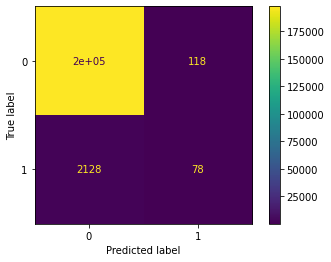

In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_xgb)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = xgb_full.classes_)
cm_display.plot();

In [9]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_xgb)

0.5173807669767068